## Calzada Jasso Andres Geovani *<span style = "color : Blue" > 23265539 </span>*

# **Notebook procesamiento de audio**

Explorar las diferentes librerías en Python para el procesamiento de audio y aplicar 5 de ellas para el tratamiento de un audio, el cual puede ser un sonido generado artificialmente, una canción, voz grabada, etc.
No limitarse a las técnicas exploradas en clase.


<img src= "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbeHETdcQ2RAGyopmOH6TmKX8rd4y-QB5SPg&usqp=CAU">

In [1]:
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import librosa

#### Sumar tres señales sinuidales de diferentes frecuencias 

In [2]:
framerate = 10000     #Se establece la tasa de muestreo de 45000 muestras por segundo 
t = np.linspace(0,5,framerate*5)     # Se creo un vector t para representar el tiempo, este varia de 0 a 5 segundos con una frecuencia de muestreo de 45000 muestras por segundo
                                     # np.linspace genera un arreglo de numeros espaciados de manera uniforme 
data = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*300*t) + np.sin(2*np.pi*800*t)   # se crean las señales senoidales de 220 Hz, 180 Hz y 320 Hz
Audio(data,rate=framerate)     # se reproduce la señal de audio muestreada, donde data tiene contiene la señal de audio y rate tiene la tasa de  muestreo 

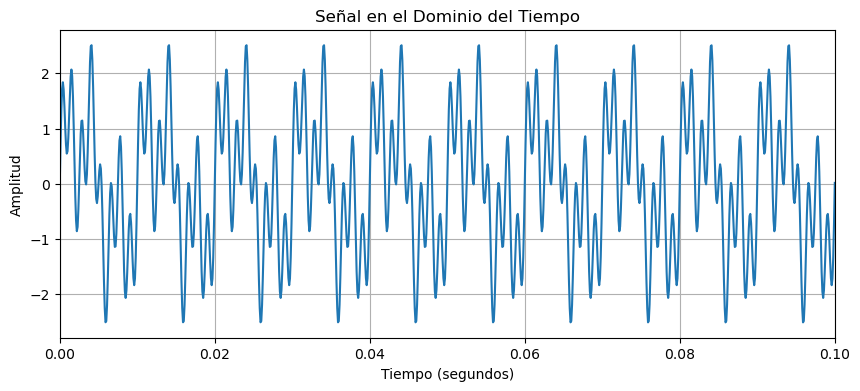

In [3]:
# Graficar 10 segundos de la señal en el dominio del tiempo
plt.figure(figsize=(10, 4))
plt.plot(t, data)
plt.title('Señal en el Dominio del Tiempo')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.xlim(0,0.1 ) 
plt.grid(True)
plt.show()

#### Visualizamos la señal en el dominio de la frecuencia para observar que es lo que pasa 


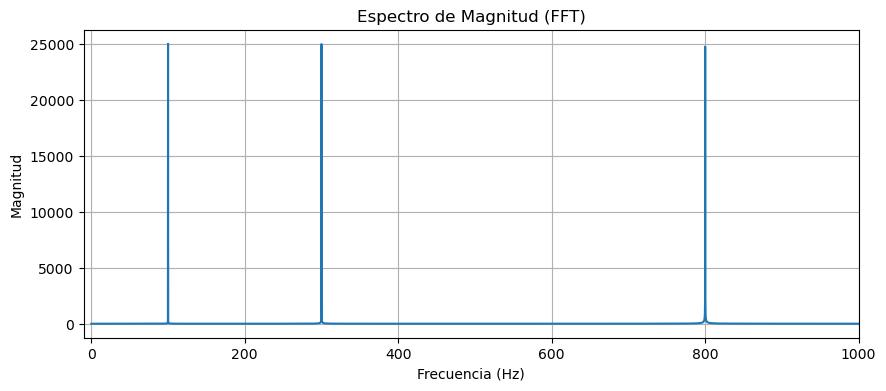

In [4]:
#Como podemos observar el espectro en frecuencia, las tres señales las cuales sumamos se ven 
#cada una a su frecuencia correspondiente.
# Calcular la FFT
fft_result = np.fft.fft(data)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(fft_result), d=1/framerate)

# Tomar solo las frecuencias positivas (la mitad debido a la simetría)
positive_frequencies = frequencies[:len(frequencies)//2]
magnitude_spectrum = np.abs(fft_result[:len(fft_result)//2])

# Graficar el espectro de magnitud
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, magnitude_spectrum)
plt.title('Espectro de Magnitud (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,1000 ) 
plt.grid(True)
plt.show()

## Calculamos el espectrograma de la señal senoidal



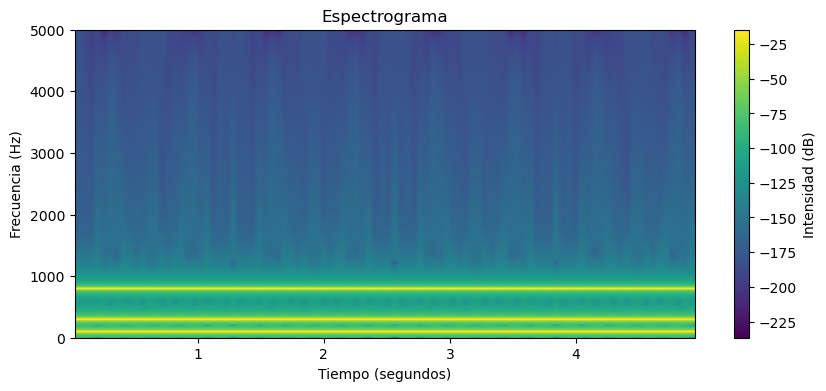

In [5]:
# Calcular el espectrograma
plt.figure(figsize=(10, 4))
#plt.specgram(data, Fs=framerate, cmap='viridis', NFFT=1024, noverlap=512)
plt.specgram(data, Fs=framerate, cmap='viridis', NFFT=1024, noverlap=512)
plt.title('Espectrograma')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Intensidad (dB)')
plt.show()

## Filtramos la señal eliminando la frecuencia de 300 Hz

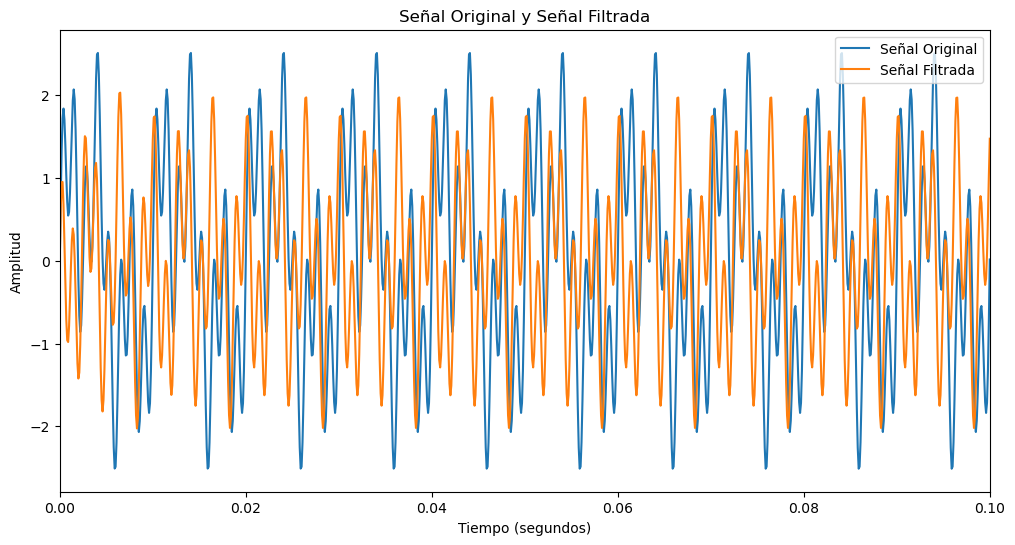

In [6]:
framerate = 10000
t = np.linspace(0, 5, framerate * 5)

# Se crea la señal original
data_original = np.sin(2 * np.pi * 100 * t) + np.sin(2 * np.pi * 300 * t) + np.sin(2 * np.pi * 800 * t)

# Frecuencia de corte del filtro pasa altas
cutoff_freq = 190

# Orden del filtro
order = 4

# Normalización de la frecuencia de corte
nyquist = 0.5 * framerate
normal_cutoff = cutoff_freq / nyquist

# Diseño del filtro Butterworth pasa altas
b, a = butter(order, normal_cutoff, btype='high', analog=False)

# Filtrar la señal original
data_filtrada = lfilter(b, a, data_original)

# Graficar la señal original y filtrada en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.plot(t, data_original, label='Señal Original')
plt.plot(t, data_filtrada, label='Señal Filtrada')
plt.title('Señal Original y Señal Filtrada')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.xlim(0,0.1 ) 
plt.legend()
plt.show()

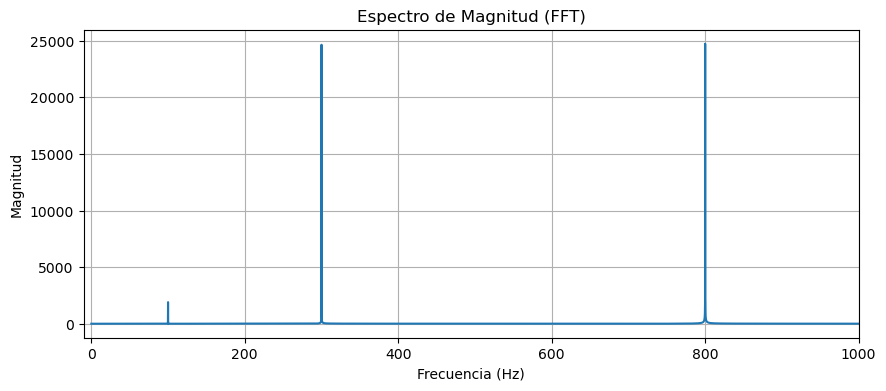

In [7]:
# Calcular la FFT
fft_result = np.fft.fft(data_filtrada)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(fft_result), d=1/framerate)

# Tomar solo las frecuencias positivas (la mitad debido a la simetría)
positive_frequencies = frequencies[:len(frequencies)//2]
magnitude_spectrum = np.abs(fft_result[:len(fft_result)//2])

# Graficar el espectro de magnitud
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, magnitude_spectrum)
plt.title('Espectro de Magnitud (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10,1000 ) 
plt.grid(True)
plt.show()

## Vamos a realizar lo mismo pero con un audio de librosa 

In [8]:
filename = librosa.example('brahms')
y, sr = librosa.load(filename)

C:\Users\IGLCH\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [9]:
Audio(data=y, rate=sr)

In [10]:
print(sr)

22050


#### Ahora una vez que tenemos nuestro audio, vamos a a ver como se comporta en el dominio del tiempo continuo, sabiendo que el tiempo de muestreo es de 22050

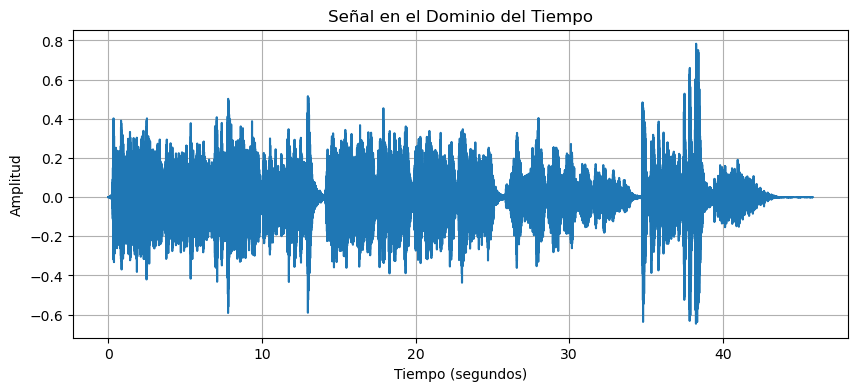

In [11]:
# Tiempo correspondiente a cada muestra
t = np.arange(0, len(y)) / sr

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title('Señal en el Dominio del Tiempo')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

### De igual manera vamos a observar como se comporta la señal en el dominio de la frecuencia.


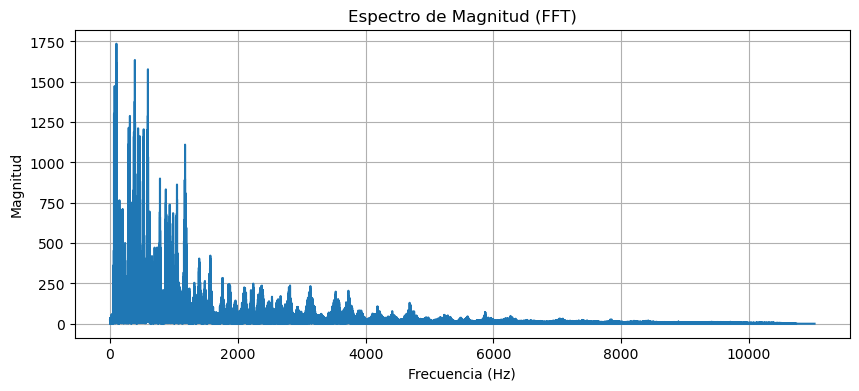

In [12]:
# Calcular la FFT
fft_result = np.fft.fft(y)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(fft_result), d=1/sr)

# Tomar solo las frecuencias positivas (la mitad debido a la simetría)
positive_frequencies = frequencies[:len(frequencies)//2]
magnitude_spectrum = np.abs(fft_result[:len(fft_result)//2])

# Graficar el espectro de magnitud
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, magnitude_spectrum)
plt.title('Espectro de Magnitud (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

como podemos observar en el Espectro de Manginutid (FFT), la mayoria de la información con respecto a la melodia descargada de librosa se encuentra en las bajas frecuencias.
Si en este momento realizamos un filtro pasa bajas, eliminamos la mayoria de nuestra información.


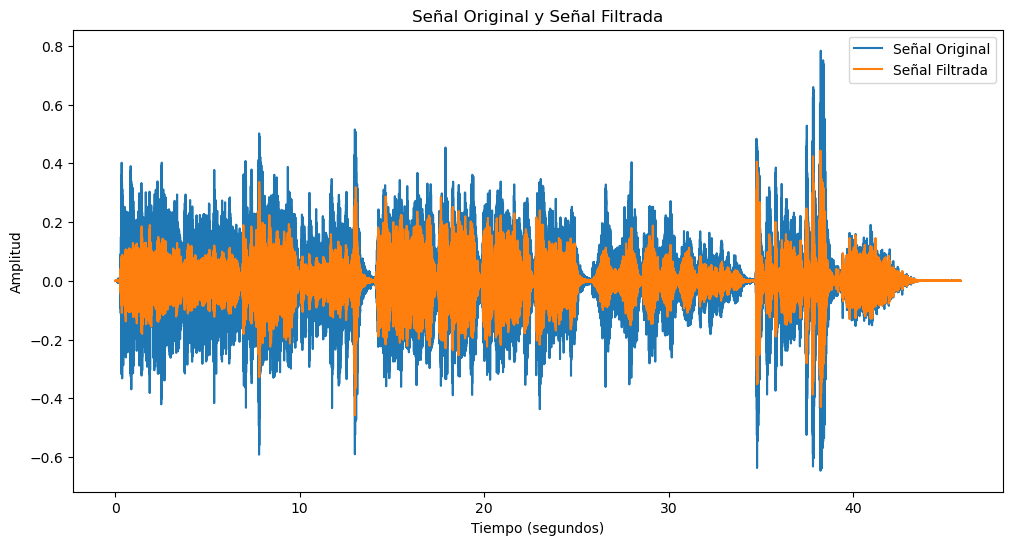

In [13]:
# Frecuencia de corte del filtro pasa altas
cutoff_freq = 1000

# Orden del filtro
order = 4

# Normalización de la frecuencia de corte
nyquist = 0.5 * sr
normal_cutoff = cutoff_freq / nyquist

# Diseño del filtro Butterworth pasa altas
b, a = butter(order, normal_cutoff, btype='high', analog=False)

# Filtrar la señal original
data_filtrada = lfilter(b, a, y)

# Graficar la señal original y filtrada en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.plot(t, y, label='Señal Original')
plt.plot(t, data_filtrada, label='Señal Filtrada')
plt.title('Señal Original y Señal Filtrada')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

### De igual manera vamos a proceder a observar como se comporta la señal en el dominio de la frecuencia.

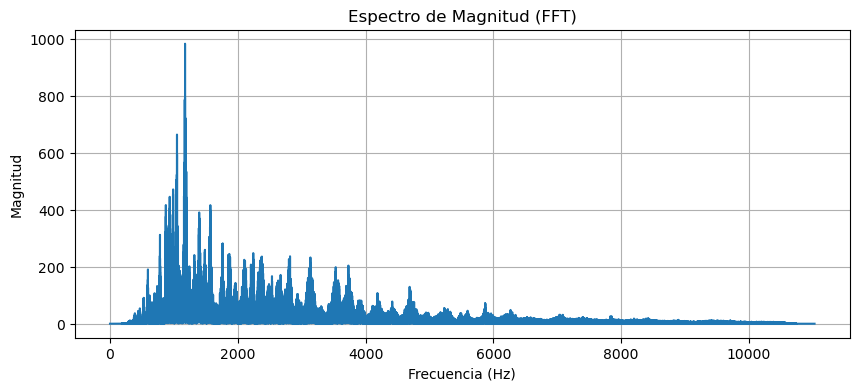

In [14]:
# Calcular la FFT
fft_result = np.fft.fft(data_filtrada)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(fft_result), d=1/sr)

# Tomar solo las frecuencias positivas (la mitad debido a la simetría)
positive_frequencies = frequencies[:len(frequencies)//2]
magnitude_spectrum = np.abs(fft_result[:len(fft_result)//2])

# Graficar el espectro de magnitud
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, magnitude_spectrum)
plt.title('Espectro de Magnitud (FFT)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

In [15]:
Audio(data=data_filtrada, rate=sr)

### Como ultima parte vamos a proceder a realizar una suma de dos audios obtenidos en librosa 

In [16]:
#Extramos la primer señal de audio
filename = librosa.example('brahms')
y1, sr1 = librosa.load(filename)

In [17]:
Audio(data=y1, rate=sr1)

In [18]:
#Extraemos la segunda señal de audio 
filename = librosa.example('trumpet')
y2, sr2 = librosa.load(filename)

In [19]:
Audio(data=y2, rate=sr2)

### como podemos observar las señales con las cuales queremos trabajar tienen diferente tiempo de duración tanto como diferente tiempo de muestreo 


### pd. corrimos con suerte de que tiene el mismo periodo de muestreo, lo que nos evita realizar un re-mestreo jajaja

In [20]:
print("Periodo de muestreo de señal 1:", sr1)
print("Periodo de muestreo de señal 2:", sr2)
print("Numero de muestras de señal 1:", len(y1))
print("Numero de muestras de señal 2:", len(y2))

Periodo de muestreo de señal 1: 22050
Periodo de muestreo de señal 2: 22050
Numero de muestras de señal 1: 1010880
Numero de muestras de señal 2: 117601


In [21]:
#El siguiente paso es recortar la señal1 para que tenga la misma longitud que la señal dos y se puedan sumar.
y1 = y1[0:117601]
print("Nueva longitud de señal 1:", len(y1))

Nueva longitud de señal 1: 117601


In [22]:
#Podemos observar que la señal ahora tambien es de 5 segundos tambien.
Audio(data=y1, rate=sr1)

In [23]:
#Sumamos las dos señales, ya que nos aseguramos que tienen el mismo tiempo de muestreo y la misma longitud
Y = y1 + y2 

Audio(data=Y, rate=sr1)

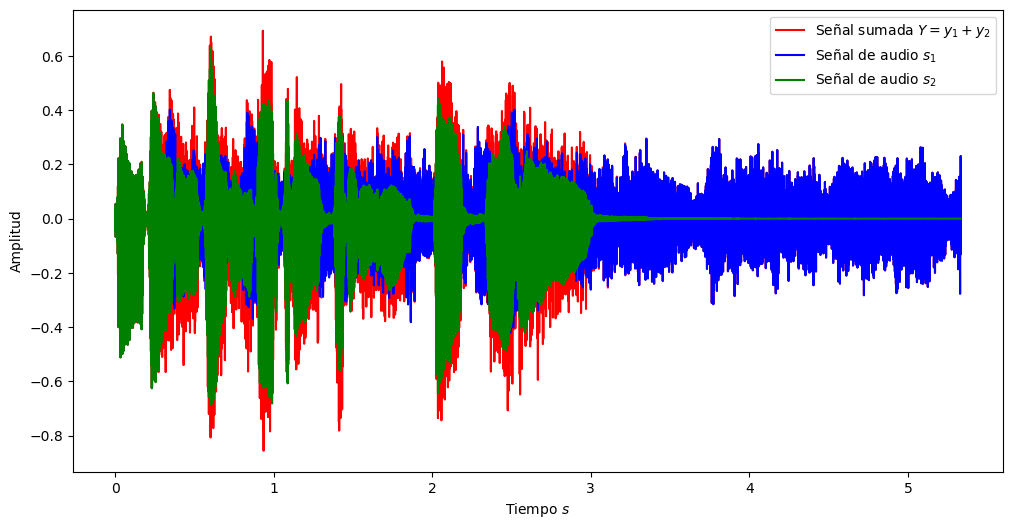

In [24]:
t = np.arange(0, len(Y))/sr
plt.figure(figsize=(12,6))
plt.plot(t, Y, label='Señal sumada $Y= y_1+y_2$', color='red')
plt.plot(t, y1, label='Señal de audio $s_1$', color='blue')
plt.plot(t, y2, label='Señal de audio $s_2$', color='green')
plt.xlabel('Tiempo $s$')
plt.ylabel('Amplitud')
plt.legend()
plt.show()